In [1]:
from fastai2.vision.all import *
import fastai2

import pdb
import torchvision
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold,StratifiedKFold

In [2]:
import pandas as pd
import numpy as np
import random
import geopandas as gpd
import rasterio
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook as tqdm

def random_seed(seed_value):
    import random 
    random.seed(seed_value) # Python
    import numpy as np
    np.random.seed(seed_value) # cpu vars
    import torch
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [3]:
df = pd.read_csv('Train.csv')

test = pd.read_csv('Test.csv')
test.head(3)
# Sample submission:
ss = pd.read_csv('SampleSubmission.csv')
ss.head(3)

,ID,Label
0,00MZGKU,0
1,015JA41,0
2,01POB64,0


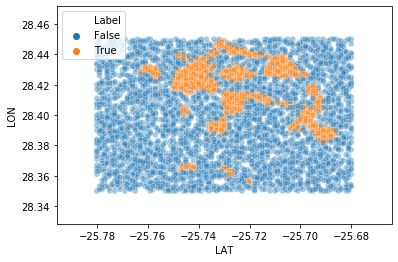

In [8]:
import seaborn as sns
sns.scatterplot(x='LAT',y='LON',hue='Label',data=df,alpha=0.4)

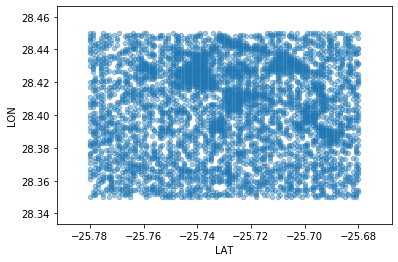

In [6]:
df.plot(x='LAT',y='LON',kind='scatter',alpha=0.4)

In [14]:
# x
from scipy.stats import gaussian_kde

# z = gaussian_kde(df)(df)

# Calculate the point density
xy = np.vstack([df['LAT'],df['LON']])
z = gaussian_kde(xy)(xy)

In [36]:
z

array([101.73421699,  52.79224829, 153.62137334, ..., 118.78400588,
        83.26916411, 103.32092534])

In [47]:
from sklearn.preprocessing import normalize,minmax_scale


[0.01554315 0.0080657  0.02347057 ... 0.01814805 0.01272203 0.01578557]


In [48]:
audio_scaled = minmax_scale(z, feature_range=(0,1))
audio_scaled

array([0.5425381 , 0.21807543, 0.88652601, ..., 0.65557033, 0.42012332,
       0.55305724])

In [51]:
audio_scaled.min()

0.0

In [52]:
df['FLabel'] = audio_scaled

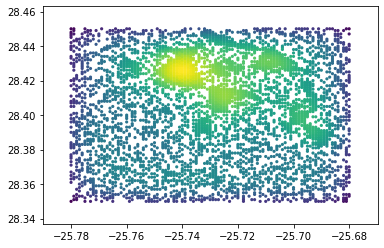

In [23]:
fig, ax = plt.subplots()
ax.scatter(df['LAT'], df['LON'], c=z, s=10, edgecolor='')
plt.show()

In [53]:
df['FLabel'].describe()

count    4281.000000
mean        0.501517
std         0.196462
min         0.000000
25%         0.382354
50%         0.464262
75%         0.635086
max         1.000000
Name: FLabel, dtype: float64

In [54]:
# Calculate the point density
xy = np.vstack([test['LAT'],test['LON']])
zt = gaussian_kde(xy)(xy)

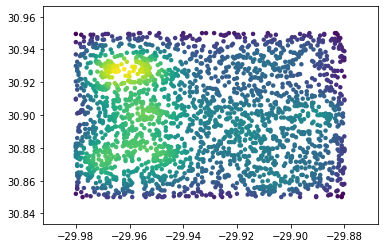

In [57]:
fig, ax = plt.subplots()
ax.scatter(test['LAT'], test['LON'], c=zt, s=20, edgecolor='')
plt.show()

In [63]:
audio_scaled = minmax_scale(zt, feature_range=(0,1))
audio_scaled

array([0.307399  , 0.35682029, 0.67414269, ..., 0.32977313, 0.4338145 ,
       0.21810505])

In [64]:
test['Label']=audio_scaled

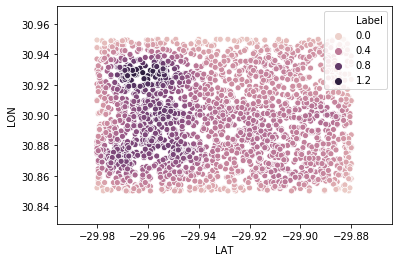

In [65]:
sns.scatterplot(test['LAT'], test['LON'],hue=test['Label'])

In [1]:
test[['ID','Label']].to_csv('leak.csv',index=False)

NameError: name 'test' is not defined